#Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pylab import *
import sys
from collections import Counter
import collections
import itertools

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
death_records=pd.read_csv('../deaths_usa/DeathRecords/DeathRecords.csv')

In [3]:
entity_axis=pd.read_csv('../deaths_usa/DeathRecords/EntityAxisConditions.csv')

In [4]:
icd10=pd.read_csv('../deaths_usa/DeathRecords/Icd10Code.csv')

In [5]:
death_records.set_index('Id',inplace=True)
death_records.head()

,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,AgeRecode52,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,1,1,M,1,87,0,43,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,37,...,21,3,3,1,0,0,1,1,100,6
3,1,0,7,1,1,F,1,75,0,41,...,28,2,2,1,0,0,1,1,100,6
4,1,0,6,1,1,M,1,74,0,40,...,22,3,3,1,0,0,1,1,100,6
5,1,0,3,1,1,M,1,64,0,38,...,21,1,1,1,0,0,1,1,100,6


In [6]:
#Assigning Literals
death_race='Race'
death_resident='ResidentStatus'
death_edu_1989='Education1989Revision'
death_edu_2003='Education2003Revision'
death_edu_report='EducationReportingFlag'
death_age='Age'
death_age_type='AgeType'

In [7]:
death_records.dtypes

ResidentStatus                     int64
Education1989Revision              int64
Education2003Revision              int64
EducationReportingFlag             int64
MonthOfDeath                       int64
Sex                               object
AgeType                            int64
Age                                int64
AgeSubstitutionFlag                int64
AgeRecode52                        int64
AgeRecode27                        int64
AgeRecode12                        int64
InfantAgeRecode22                  int64
PlaceOfDeathAndDecedentsStatus     int64
MaritalStatus                     object
DayOfWeekOfDeath                   int64
CurrentDataYear                    int64
InjuryAtWork                      object
MannerOfDeath                      int64
MethodOfDisposition               object
Autopsy                           object
ActivityCode                       int64
PlaceOfInjury                      int64
Icd10Code                         object
CauseRecode358  

In [8]:
#Lets see how many different Race of people have died/injured.
#18 represents the Asian Indian community
death_records['Race'].value_counts()

1     881161
2     122025
7       8159
4       7983
5       6644
3       6416
68      4088
48      2941
18      2906
28      2884
78      2306
6        459
38       426
58       177
dtype: int64

In [9]:
race_indians=death_records[death_records[death_race]==18]
print race_indians.shape
race_indians.head()

(2906, 37)


,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,AgeRecode52,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
Id,,,,,,,,,,,,,,,,,,,,,
2709,1,0,3,1,9,M,1,34,0,32,...,39,3,3,18,0,0,2,4,100,8
53802,2,0,2,1,1,F,1,16,0,29,...,34,3,3,18,0,0,2,4,100,8
53987,1,0,6,1,2,M,1,40,0,34,...,27,4,3,18,0,0,2,4,100,8
55545,1,0,7,1,3,M,1,90,0,44,...,21,4,4,18,0,0,2,4,100,8
58741,1,0,3,1,2,F,1,64,0,38,...,24,1,1,18,0,0,2,4,100,8


In [10]:
print race_indians[death_edu_2003].value_counts()
print race_indians[death_edu_2003].value_counts()/len(race_indians)*100

3    703
1    626
6    569
7    341
8    220
4    162
2    149
5     94
9     42
dtype: int64
3    24.191328
1    21.541638
6    19.580179
7    11.734343
8     7.570544
4     5.574673
2     5.127323
5     3.234687
9     1.445286
dtype: float64


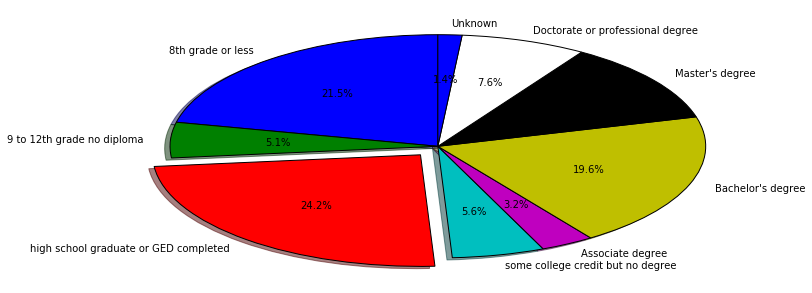

In [11]:
#Visualization of the educational qualifications of Indian people who died.
plt.figure(figsize=(12,5))
labels="8th grade or less","9 to 12th grade no diploma","high school graduate or GED completed","some college credit but no degree","Associate degree","Bachelor's degree","Master's degree","Doctorate or professional degree","Unknown"

fracs=[21.541638,5.127323,24.191328,5.574673,3.234687,19.580179,11.734343,7.570544,1.445286]
explode=(0,0,0.1,0,0,0,0,0,0)
pie(fracs, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

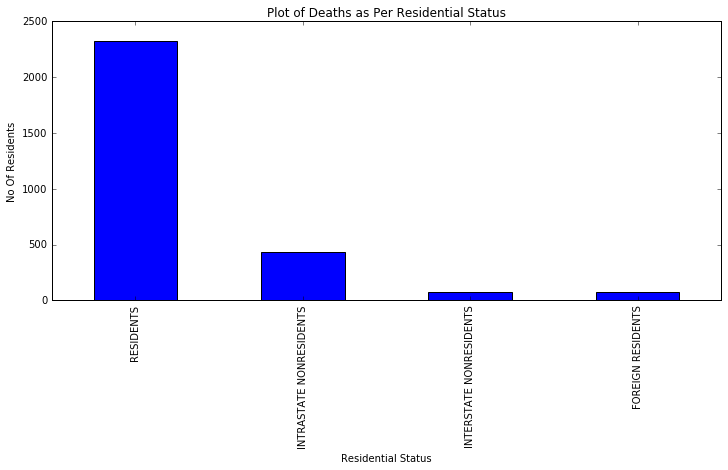

In [12]:
#Visualization of deaths as per residential status.
plt.figure(figsize=(12,5))
x=[0,1,2,3]
labels=['RESIDENTS','INTRASTATE NONRESIDENTS','INTERSTATE NONRESIDENTS','FOREIGN RESIDENTS']
race_indians[death_resident].value_counts().plot(kind='bar')
plt.xticks(x,labels,rotation='vertical')
plt.title('Plot of Deaths as Per Residential Status')
plt.xlabel('Residential Status')
plt.ylabel('No Of Residents')
plt.show() 

In [13]:
print entity_axis.shape
#entity_axis.set_index('Id',inplace=True)
entity_axis.head()

(8052877, 6)


,Id,DeathRecordId,Part,Line,Sequence,Icd10Code
0,1,1,1,1,1,I64
1,2,2,1,1,1,I250
2,3,2,2,NaN,1,I272
3,4,2,2,NaN,2,E669
4,5,3,1,1,1,J449


In [14]:
aggregate_entity=entity_axis.groupby(['DeathRecordId']).agg({'Sequence':np.unique,
                                                            'Icd10Code':np.unique})

In [15]:
print aggregate_entity.shape
aggregate_entity.reset_index(inplace=True)
aggregate_entity.head()

(2631171, 2)


,DeathRecordId,Icd10Code,Sequence
0,1,I64,1
1,2,"[E669, I250, I272]","[1, 2]"
2,3,"[F179, J449]",1
3,4,"[F03, I48, I64]",1
4,5,I250,1


In [16]:
race_indians.reset_index(inplace=True)
race_indians.head()

,Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
0,2709,1,0,3,1,9,M,1,34,0,...,39,3,3,18,0,0,2,4,100,8
1,53802,2,0,2,1,1,F,1,16,0,...,34,3,3,18,0,0,2,4,100,8
2,53987,1,0,6,1,2,M,1,40,0,...,27,4,3,18,0,0,2,4,100,8
3,55545,1,0,7,1,3,M,1,90,0,...,21,4,4,18,0,0,2,4,100,8
4,58741,1,0,3,1,2,F,1,64,0,...,24,1,1,18,0,0,2,4,100,8


In [17]:
common_ids=pd.Series(list(set(race_indians['Id']).intersection(set(aggregate_entity['DeathRecordId']))))

In [18]:
len(common_ids)

2906

In [24]:
race_indians.head()

,Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
0,2709,1,0,3,1,9,M,1,34,0,...,39,3,3,18,0,0,2,4,100,8
1,53802,2,0,2,1,1,F,1,16,0,...,34,3,3,18,0,0,2,4,100,8
2,53987,1,0,6,1,2,M,1,40,0,...,27,4,3,18,0,0,2,4,100,8
3,55545,1,0,7,1,3,M,1,90,0,...,21,4,4,18,0,0,2,4,100,8
4,58741,1,0,3,1,2,F,1,64,0,...,24,1,1,18,0,0,2,4,100,8


In [25]:
race_indians_entity_new=aggregate_entity[aggregate_entity['DeathRecordId'].isin(race_indians['Id'])]

In [26]:
#The account of Indians and their death causes
race_indians_entity_new.to_csv('../deaths_usa/processed_data/race_indians_entity_new.csv')
print race_indians_entity_new.shape
race_indians_entity_new.head()

(2906, 3)


,DeathRecordId,Icd10Code,Sequence
2708,2709,"[F199, T436, X41]","[1, 2]"
53801,53802,"[E871, J988, Q780]",1
53986,53987,"[J111, J189, J80, J960]",1
55544,55545,"[E785, I10, I219, I251]","[1, 2]"
58740,58741,I64,1


In [41]:
#We extract the causes of deaths for Indians.
def freq_sorted(iterable, key=None, reverse=False, include_freq=False):
  """Return a list of items from iterable sorted by frequency.

  If include_freq, (item, freq) is returned instead of item.

  key(item) must be hashable, but items need not be.

  *Higher* frequencies are returned first.  Within the same frequency group,
  items are ordered according to key(item).
  """
  if key is None:
    key = lambda x: x

  key_counts = collections.defaultdict(int)
  items = {}
  for n in iterable:
    k = key(n)
    key_counts[k] += 1
    items.setdefault(k, n)

  if include_freq:
    def get_item(k, c):
      return items[k], c
  else:
    def get_item(k, c):
      return items[k]

  return [get_item(k, c) for k, c in
          sorted(key_counts.items(),
                 key=lambda kc: (-kc[1], kc[0]),
                 reverse=reverse)]
#print freq_sorted(itertools.chain.from_iterable(race_indians_entity_new['Icd10Code']), include_freq=True)

death_issues_df_indians=pd.DataFrame(freq_sorted(itertools.chain.from_iterable(race_indians_entity_new['Icd10Code']), include_freq=True),columns=['Code','Deaths'])

In [42]:
print death_issues_df_indians.shape
len(death_issues_df_indians)

(847, 2)


847

There were 847 causes to deaths for Indians living in USA. Below we give the percentage output of how many died from which kind of disease.

In [43]:
death_issues_df_indians['Percentage']=[float(x)/len(death_issues_df_indians)*100 for x in death_issues_df_indians['Deaths']]
death_issues_df_indians.head()

,Code,Deaths,Percentage
0,I469,643,75.914994
1,I251,505,59.622196
2,I10,431,50.885478
3,9,338,39.905549
4,E149,268,31.641086


In [46]:
#Here we finally get the description of deaths of the Indians
desc_of_deaths=pd.merge(death_issues_df_indians,icd10,on='Code')

In [48]:
print desc.shape
desc.head(10)

(822, 4)


,Code,Deaths,Percentage,Description
0,I469,643,75.914994,"Cardiac arrest, unspecified"
1,I251,505,59.622196,Atherosclerotic heart disease
2,I10,431,50.885478,Essential (primary) hypertension
3,E149,268,31.641086,Unspecified diabetes mellitus: Without complic...
4,I500,249,29.397875,Congestive heart failure
5,J969,232,27.390791,"Respiratory failure, unspecified"
6,I219,224,26.446281,"Acute myocardial infarction, unspecified"
7,A419,207,24.439197,"Sepsis, unspecified"
8,J189,167,19.716647,"Pneumonia, unspecified"
9,E119,157,18.536009,Non-insulin-dependent diabetes mellitus: Witho...


In [50]:
desc_of_deaths.dtypes

Code            object
Deaths           int64
Percentage     float64
Description     object
dtype: object

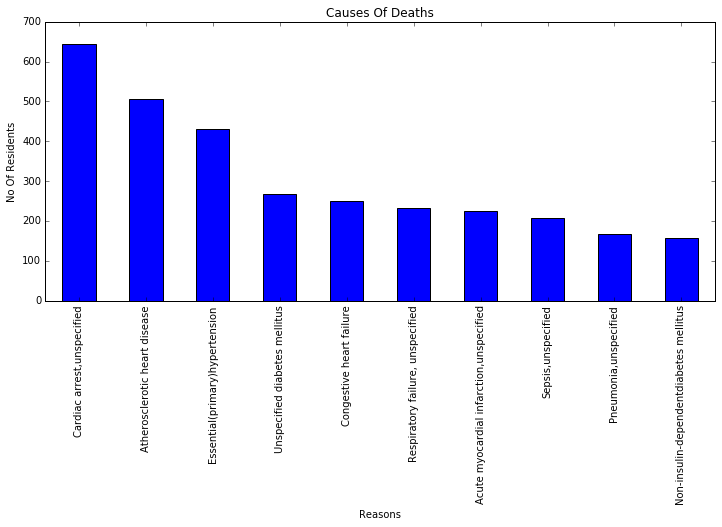

In [53]:
#We might take a look at the top reason of deaths
plt.figure(figsize=(12,5))
x=[0,1,2,3,4,5,6,7,8,9]
labels=['Cardiac arrest,unspecified','Atherosclerotic heart disease','Essential(primary)hypertension',
        'Unspecified diabetes mellitus','Congestive heart failure','Respiratory failure, unspecified',
       'Acute myocardial infarction,unspecified','Sepsis,unspecified','Pneumonia,unspecified',
       'Non-insulin-dependentdiabetes mellitus']
desc_of_deaths['Deaths'].head(10).plot(kind='bar')
plt.xticks(x,labels,rotation='vertical')
plt.title('Causes Of Deaths')
plt.xlabel('Reasons')
plt.ylabel('No Of Residents')
plt.show() 